In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [45]:
data=pd.read_csv("Salary_Data_v2.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [46]:
x= data.iloc[:,:-1]
y=data.iloc[:,1]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.transform(x_test)
poly_model=LinearRegression()
poly_model.fit(x_poly_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [48]:
y_poly_pred_train=poly_model.predict(x_poly_train)
y_poly_pred_test=poly_model.predict(x_poly_test)

In [49]:
x_range = np .linspace(x.min(),x.max(),100).reshape(-1,1)#projection
x_range_poly=poly.transform(x_range)
y_range_pred=poly_model.predict(x_range_poly)

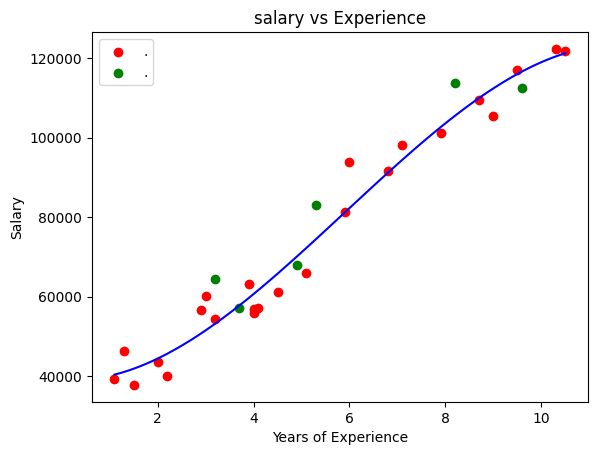

In [50]:
plt.scatter(x_train,y_train,color='red',label="Train data")
plt.scatter(x_test,y_test,color='green',label="Test data")
plt.plot(x_range,y_range_pred,color='blue',label="Polynomial Regrssion")
plt.title("salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend("..")
plt.show()

In [53]:
mse=mean_squared_error(y_train,y_poly_pred_train)
print(mse)
mse=mean_squared_error(y_test,y_poly_pred_test)
print(mse)
rmse=root_mean_squared_error(y_test,y_poly_pred_test)
print(rmse)

21929031.375698842
48605815.331887715
6971.787097429734
